In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr

In [ ]:
summa_ds = xr.open_dataset('../model/output/harts_pass/template_output_harts_SNTL_WY23_timestep.nc')
summa = summa_ds.to_dataframe().reset_index()
summa['time'] = pd.to_datetime(summa['time'])
summa.set_index('time', inplace=True)

obs = pd.read_csv('../processing/methow/harts_met_WY23.csv')

# obs = obs[obs['Date_Time'] > '2023-10-17'] 

obs.rename(columns={'Date_Time':'time', 'AirTC_Avg':'airtemp', 'RH':'rh', 'WS_ms_S_WVT':'windspd', 
                    'WindDir_D1_WVT':'winddir', 'snow_water_equiv_set_1':'swe', 'snow_depth_set_1':'snowdepth'}, inplace=True)
obs['time'] = pd.to_datetime(obs['time'])
# obs['time'] = obs['time'].dt.strftime('%Y-%m-%d %H:%M:%S')

obs.set_index('time', inplace=True)


: 

In [2]:
obs.loc[obs['snowdepth'] > 3000, 'snowdepth'] = np.nan
obs['snowdepth'] = obs['snowdepth'].interpolate(method='linear')

obs['snowdepth'] = obs['snowdepth']/1000
obs['density'] = obs['swe']/obs['snowdepth']

obs.loc[obs['density'] > 700, 'density'] = np.nan
obs['density'] = obs['density'].interpolate(method='linear')




NameError: name 'obs' is not defined

In [7]:
harts_jrdn = xr.open_dataset('./template_output_harts_jrdn_WY23_timestep.nc')
harts_2K = xr.open_dataset('./template_output_harts_+2K_WY23_timestep.nc')
harts_4K = xr.open_dataset('./template_output_harts_+4K_WY23_timestep.nc')
harts_6K = xr.open_dataset('./template_output_harts_+6K_WY23_timestep.nc')
harts_jrdn

FileNotFoundError: [Errno 2] No such file or directory: '/Users/clintonalden/Documents/Research/summa_work/analysis/template_output_harts_jrdn_WY23_timestep.nc'

Text(0.5, 1.0, 'Harts Pass Bulk Density WY23')

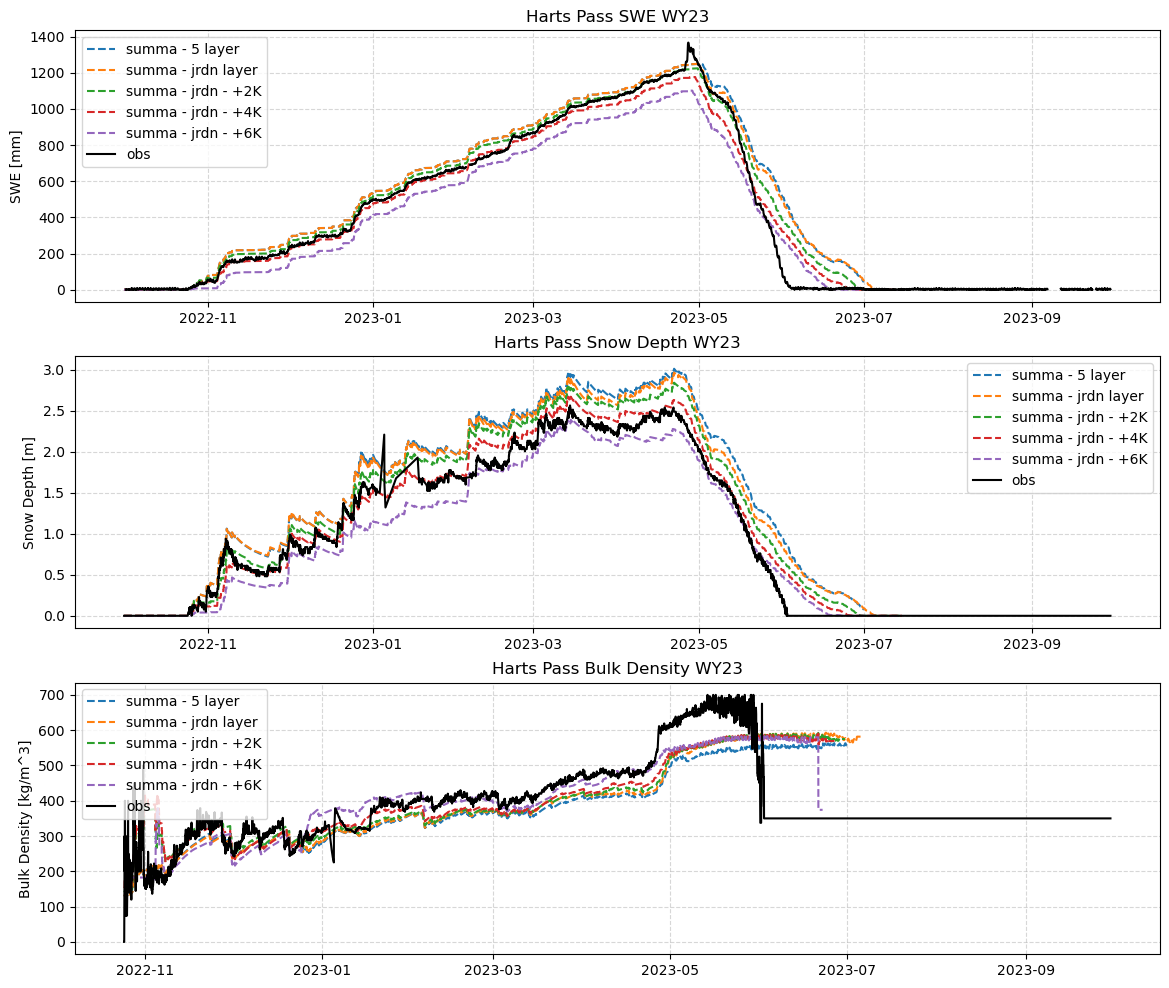

In [ ]:
fig, ax = plt.subplots(3, 1, figsize=(14, 12))

ax[0].plot(summa.index, summa['scalarSWE'], label='summa - 5 layer', ls='--')
ax[0].plot(harts_jrdn.time, harts_jrdn['scalarSWE'], label='summa - jrdn layer', ls='--')
ax[0].plot(harts_2K.time, harts_2K['scalarSWE'], label='summa - jrdn - +2K', ls='--')
ax[0].plot(harts_4K.time, harts_4K['scalarSWE'], label='summa - jrdn - +4K', ls='--')
ax[0].plot(harts_6K.time, harts_6K['scalarSWE'], label='summa - jrdn - +6K', ls='--')
ax[0].plot(obs.index, obs['swe'], label='obs', color='k')
ax[0].grid(ls='--', alpha=0.5)
ax[0].legend()
ax[0].set_ylabel('SWE [mm]')
ax[0].set_title('Harts Pass SWE WY23')

ax[1].plot(summa.index, summa['scalarSnowDepth'], label='summa - 5 layer', ls='--')
ax[1].plot(harts_jrdn.time, harts_jrdn['scalarSnowDepth'], label='summa - jrdn layer', ls='--')
ax[1].plot(harts_2K.time, harts_2K['scalarSnowDepth'], label='summa - jrdn - +2K', ls='--')
ax[1].plot(harts_4K.time, harts_4K['scalarSnowDepth'], label='summa - jrdn - +4K', ls='--')
ax[1].plot(harts_6K.time, harts_6K['scalarSnowDepth'], label='summa - jrdn - +6K', ls='--')
ax[1].plot(obs.index, obs['snowdepth'], label='obs', color='k')
ax[1].grid(ls='--', alpha=0.5)
ax[1].legend()
ax[1].set_ylabel('Snow Depth [m]')
ax[1].set_title('Harts Pass Snow Depth WY23')

ax[2].plot(summa.index, summa['scalarSWE']/summa['scalarSnowDepth'], label='summa - 5 layer', ls='--')
ax[2].plot(harts_jrdn.time, harts_jrdn['scalarSWE']/harts_jrdn['scalarSnowDepth'], label='summa - jrdn layer', ls='--')
ax[2].plot(harts_2K.time, harts_2K['scalarSWE']/harts_2K['scalarSnowDepth'], label='summa - jrdn - +2K', ls='--')
ax[2].plot(harts_4K.time, harts_4K['scalarSWE']/harts_4K['scalarSnowDepth'], label='summa - jrdn - +4K', ls='--')
ax[2].plot(harts_6K.time, harts_6K['scalarSWE']/harts_6K['scalarSnowDepth'], label='summa - jrdn - +6K', ls='--')
ax[2].plot(obs.index, obs['density'], label='obs', color='k')
ax[2].grid(ls='--', alpha=0.5)
ax[2].legend()
ax[2].set_ylabel('Bulk Density [kg/m^3]')
ax[2].set_title('Harts Pass Bulk Density WY23')

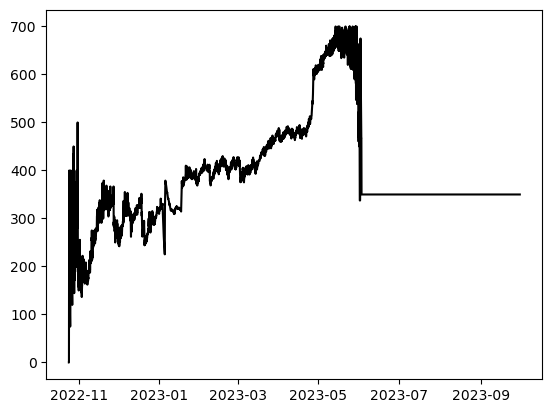

In [ ]:
fig, ax = plt.subplots()

ax.plot(obs.index, obs['density'], label='obs', color='k')

In [ ]:
path = '/Users/clintonalden/Documents/Research/summa_work/model/forcings/salmon_WY23.nc'
force = xr.open_dataset(path)
force

<xarray.Dataset> Size: 630kB
Dimensions:     (time: 8745, hru: 1)
Coordinates:
  * time        (time) datetime64[ns] 70kB 2022-10-01 ... 2023-09-30T08:00:00
Dimensions without coordinates: hru
Data variables:
    airtemp     (time, hru) float64 70kB ...
    pptrate     (time, hru) float64 70kB ...
    airpres     (time, hru) float64 70kB ...
    spechum     (time, hru) float64 70kB ...
    SWRadAtm    (time, hru) float64 70kB ...
    LWRadAtm    (time, hru) float64 70kB ...
    windspd     (time, hru) float64 70kB ...
    gap_filled  (hru, time) float64 70kB ...
    data_step   float64 8B ...
    hruId       (hru) int32 4B ...

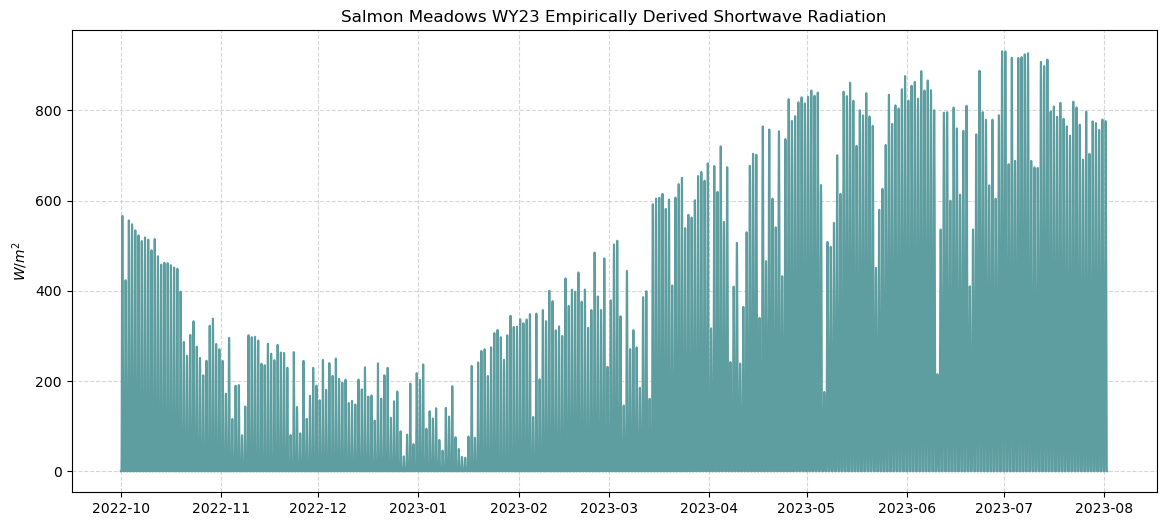

In [ ]:


fig, ax = plt.subplots(1, 1, figsize=(14, 6))

subset_force = force.sel(time=slice(None, '2023-08-01'))

ax.plot(subset_force.time, subset_force.SWRadAtm, label='SWRadAtm', color='cadetblue')

ax.set_ylabel('$W/m^2$')
ax.set_title('Salmon Meadows WY23 Empirically Derived Shortwave Radiation')
ax.grid(ls='--', alpha=0.5)


In [8]:
def justify(a, invalid_val=np.nan, axis=1, side='right'):
    """
    Justifies a 2D array
    Courtesy: https://stackoverflow.com/questions/44558215/python-justifying-numpy-array/44559180#44559180

    Parameters
    ----------
    A : ndarray
        Input array to be justified
    axis : int
        Axis along which justification is to be made
    side : str
        Direction of justification. It could be 'left', 'right', 'up', 'down'
        It should be 'left' or 'right' for axis=1 and 'up' or 'down' for axis=0.

    """
    if invalid_val is np.nan:
        mask = ~np.isnan(a)
    else:
        mask = a!=invalid_val
    justified_mask = np.sort(mask,axis=axis)
    if (side=='up') | (side=='left'):
        justified_mask = np.flip(justified_mask,axis=axis)
    out = np.full(a.shape, invalid_val)
    if axis==1:
        out[justified_mask] = a[mask]
    else:
        out.T[justified_mask.T] = a.T[mask.T]
    return out

In [9]:
from matplotlib import cm
import matplotlib as mpl



def layers(var, depth, ax=None, colormap='viridis', plot_soil=True,
           plot_snow=True, variable_range=None, add_colorbar=True,
           line_kwargs={}, cbar_kwargs={}):
    """
    Makes a layers plot. Example usage:

    ::

        import pysumma.plotting as psp
        time_range = slice('10-29-2000', '04-30-2001')
        depth    = ds.isel(hru=0).sel(time=time_range)['iLayerHeight']
        temp     = ds.isel(hru=0).sel(time=time_range)['mLayerTemp']
        psp.layers(temp, depth)

    Parameters
    ----------
    var: xr.DataArray
        The variable holding the data to plot.
        Typically begins with ``mLayer``.
    depth: xr.DataArray
        The variable defining the depths of the interfaces
        of each layer. Typically should be ``iLayerHeight``
    ax: Axes
        The axis to plot on. If none is given, a new axis
        will be created
    colormap: string, default='viridis'
        The colormap to use
    plot_soil: boolean, default=True
        Whether to plot the soil domain
    plot_snow: boolean, default=True
        Whether to plot the snow domain
    variable_range: List[float], default=variable range
        The range of numerical values to use. Must be two numbers.
    add_colorbar: boolean, default=True
        Whether to add a colorbar
    line_kwargs: Dict, default={}
        Keyword arguments to pass to ax.vlines.
        These draw the individual layers.
    cbar_kwargs: Dict, default={}
        Keyword arguments to draw the colorbar.
        They are passed directly to plt.colorbar.
    """
    # Preprocess the data
    vmask = var != -9999
    dmask = depth != -9999
    depth.values = justify(depth.where(dmask).values)
    var.values = justify(var.where(vmask).values)
    lo_depth = depth.where(depth > 0).T
    hi_depth = depth.where(depth < 0).T
    if plot_soil and not plot_snow:
        var = var.where((depth > 0).values[:,:-1]).T
    elif plot_snow and not plot_soil:
        var = var.where((depth < 0).values[:,:-1]).T
    else:
        var = var.T
    time = depth.time.values

    # Map colors to full range of data
    if variable_range is not None:
        assert len(variable_range) == 2, 'variable_range must have 2 values!'
        norm = plt.Normalize(variable_range[0], variable_range[1])
    else:
        norm = plt.Normalize(np.nanmin(var), np.nanmax(var))
    cmap = mpl.cm.get_cmap(colormap)
    rgba = cmap(norm(var))

    # Create axes if needed
    if not ax:
        fig, ax = plt.subplots(figsize=(18,8))

    # Plot soil layers - need to reverse because we plot bottom down
    if plot_soil:
        for l in lo_depth.ifcToto.values[:-1][::-1]:
            y = lo_depth[l]
            y[np.isnan(y)] = 0
            ax.vlines(time, ymin=-y, ymax=0, color=rgba[l], **line_kwargs)

    # Plot snow layers - plot top down
    if plot_snow:
        for l in hi_depth.ifcToto.values[:-1]:
            y = hi_depth[l]
            y[np.isnan(y)] = 0
            if (y != 0).any():
                ax.vlines(time, ymin=0, ymax=-y, color=rgba[l], **line_kwargs)

    # Add the colorbar
    mappable = cm.ScalarMappable(norm=norm, cmap=cmap)
    mappable.set_array(var.values.flatten())
    try:
        label = var.long_name
    except:
        label = var.name
    if 'label' not in cbar_kwargs.keys():
        cbar_kwargs['label'] = label
    if 'ax' not in cbar_kwargs.keys():
        cbar_kwargs['ax'] = ax
    if add_colorbar:
        plt.gcf().colorbar(mappable, **cbar_kwargs)
    return ax, mappable

In [14]:
summa_ds = xr.open_dataset('../model/output/harts_pass/template_output_harts_+6K_WY23_timestep.nc')
summa_ds

<xarray.Dataset> Size: 45MB
Dimensions:                    (time: 6889, hru: 1, gru: 1, midToto: 109,
                                midSoil: 9, ifcToto: 110)
Coordinates:
  * time                       (time) datetime64[ns] 55kB 2022-10-01 ... 2023...
  * hru                        (hru) int64 8B 1001
  * gru                        (gru) int64 8B 1001
Dimensions without coordinates: midToto, midSoil, ifcToto
Data variables: (12/51)
    pptrate                    (time, hru) float64 55kB ...
    airtemp                    (time, hru) float64 55kB ...
    SWRadAtm                   (time, hru) float64 55kB ...
    LWRadAtm                   (time, hru) float64 55kB ...
    averageInstantRunoff       (time, gru) float64 55kB ...
    averageRoutedRunoff        (time, gru) float64 55kB ...
    ...                         ...
    scalarSoilBaseflow         (time, hru) float64 55kB ...
    scalarAquiferBaseflow      (time, hru) float64 55kB ...
    scalarTotalRunoff          (time, hru) float64 55kB ...
    scalarNetRadiation         (time, hru) float64 55kB ...
    hruId                      (hru) int64 8B ...
    gruId                      (gru) int64 8B ...
Attributes: (12/34)
    summaVersion:     v3.1.2
    buildTime:        Fri 10 Feb 2023 02:32:58 PM UTC
    gitBranch:        master-0-gfa9adf8
    gitHash:          fa9adf808229a45085defdc2bb8ef05836b9b3aa
    soilCatTbl:       ROSETTA
    vegeParTbl:       MODIFIED_IGBP_MODIS_NOAH
    ...               ...
    compaction:       anderson
    thCondSnow:       smnv2000
    thCondSoil:       funcSoilWet
    spatial_gw:       localColumn
    subRouting:       timeDlay
    snowDenNew:       pahaut_76

/var/folders/db/7c91t8d577n1zsyhth1xc7840000gn/T/ipykernel_47155/3444126377.py:69: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = mpl.cm.get_cmap(colormap)


(<Axes: >, <matplotlib.cm.ScalarMappable at 0x2cf80f410>)

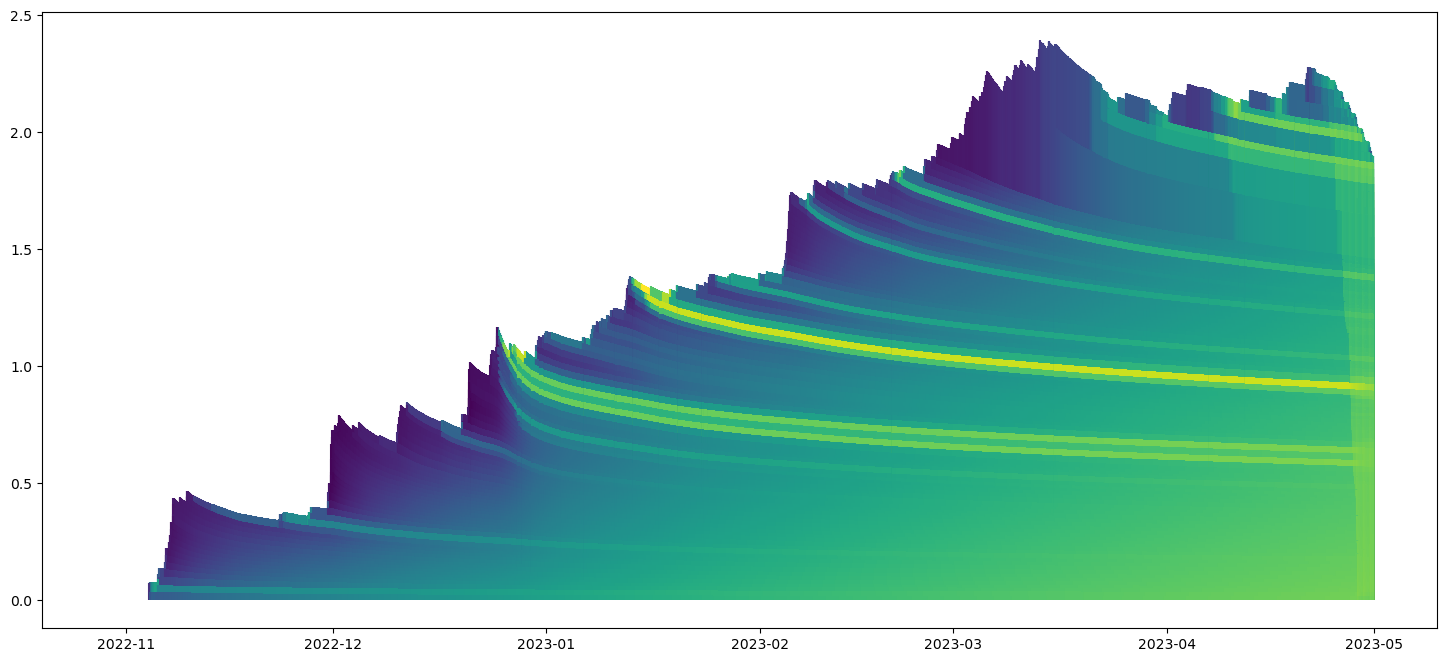

In [21]:
time_range = slice('10-29-2022', '04-30-2023')
time = summa_ds.sel(time=time_range)['time']
depth    = summa_ds.isel(hru=0).sel(time=time_range)['iLayerHeight']
temp     = summa_ds.isel(hru=0).sel(time=time_range)['mLayerTemp']
frac_wat  = summa_ds.isel(hru=0).sel(time=time_range)['mLayerVolFracWat']
layers(frac_wat, depth, plot_soil=False)

In [40]:
# vmask = var != -9999
dmask = depth != -9999
temp = temp != -9999
depth.values = justify(depth.where(dmask).values)
# var.values = justify(var.where(vmask).values)
lo_depth = depth.where(depth > 0).T
hi_depth = depth.where(depth < 0).T

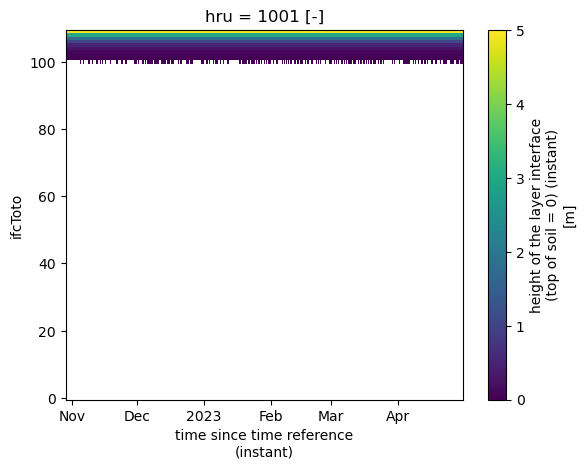

In [41]:
sort_lo = lo_depth.values[lo_depth.values>0.5]
lo_depth.plot()

In [42]:
lo_depth

<xarray.DataArray 'iLayerHeight' (ifcToto: 110, time: 4416)> Size: 4MB
array([[ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       ...,
       [1.75, 1.75, 1.75, ..., 1.75, 1.75, 1.75],
       [3.  , 3.  , 3.  , ..., 3.  , 3.  , 3.  ],
       [5.  , 5.  , 5.  , ..., 5.  , 5.  , 5.  ]])
Coordinates:
  * time     (time) datetime64[ns] 35kB 2022-10-29 ... 2023-04-30T23:00:00.00...
    hru      int64 8B 1001
Dimensions without coordinates: ifcToto
Attributes:
    long_name:  height of the layer interface (top of soil = 0) (instant)
    units:      m

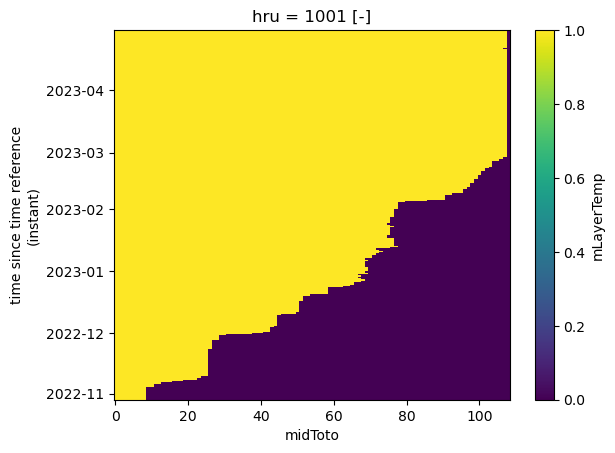

In [43]:
temp.plot()

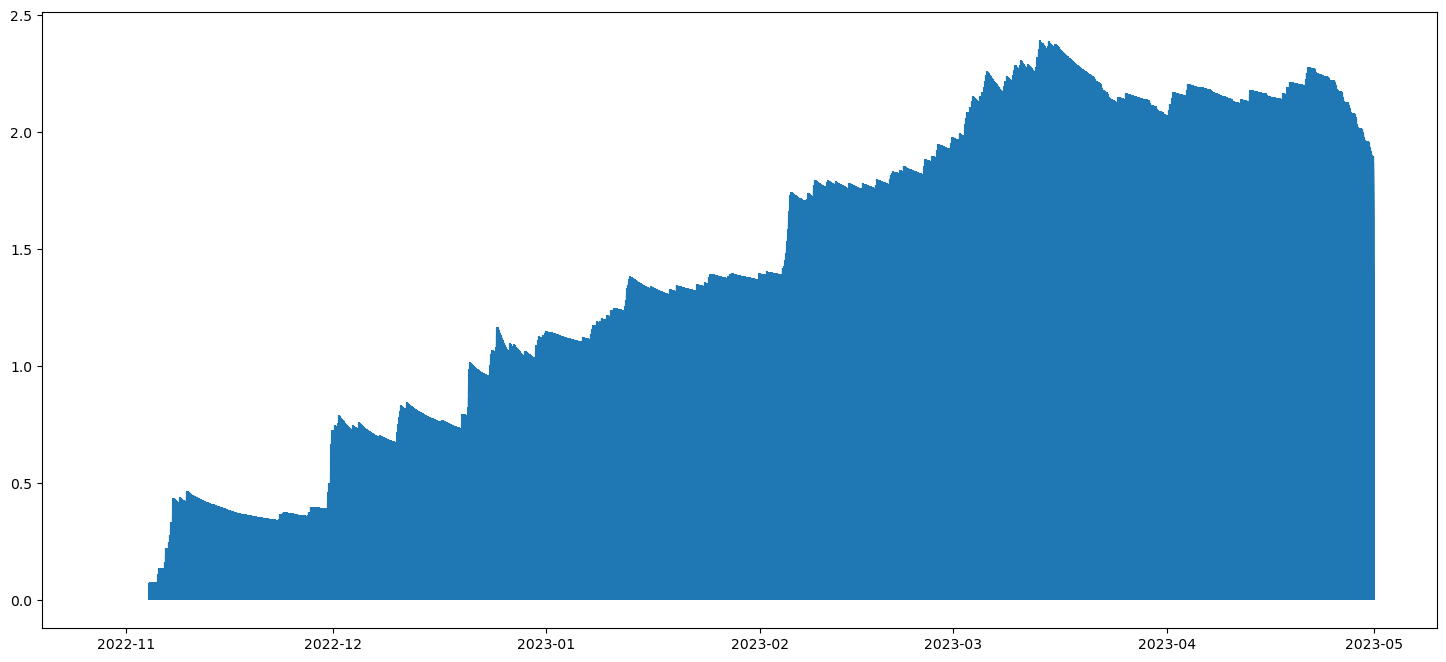

In [23]:
fig, ax = plt.subplots(figsize=(18,8))
for l in hi_depth.ifcToto.values[:-1]:
    y = hi_depth[l]
    y[np.isnan(y)] = 0
    if (y != 0).any():
        ax.vlines(time, ymin=0, ymax=-y)

In [31]:
hi_depth.ifcToto.values[:-1]

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13])

In [25]:
depth

<xarray.DataArray 'iLayerHeight' (time: 4416, ifcToto: 15)> Size: 530kB
array([[        nan, -0.26142382, -0.24593808, ...,  1.75      ,
         3.        ,  5.        ],
       [        nan, -0.26078503, -0.24529246, ...,  1.75      ,
         3.        ,  5.        ],
       [        nan, -0.26016365, -0.24466485, ...,  1.75      ,
         3.        ,  5.        ],
       ...,
       [-2.5144713 , -2.49419149, -2.40829289, ...,  1.75      ,
         3.        ,  5.        ],
       [-2.51327745, -2.49367741, -2.40778041, ...,  1.75      ,
         3.        ,  5.        ],
       [-2.51213578, -2.4931654 , -2.40726997, ...,  1.75      ,
         3.        ,  5.        ]])
Coordinates:
  * time     (time) datetime64[ns] 35kB 2022-10-29 ... 2023-04-30T23:00:00.00...
    hru      int64 8B 1001
Dimensions without coordinates: ifcToto
Attributes:
    long_name:  height of the layer interface (top of soil = 0) (instant)
    units:      m